# Linear Regression Notebook

In [22]:
# LinearRegressionNotebook.ipynb

# **Linear Regression Implementation Notebook**
# This notebook contains code for building a Linear Regression model from scratch.
# Follow the instructions and complete each section.

# # Part 1: Imports and Setup

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
import tkinter as tk        # sudo apt install python3-tk
from PIL import Image, ImageGrab    # pip install pillow

# Helper Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


## Class Definition

In [23]:
# # Part 2: Logistic Regression Class Definition
# In this section, we will define the Linear Regression class structure.
# Follow the TODO comments to complete each function.

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the LogisticRegression model with learning rate and number of epochs.

        Parameters:
        - learning_rate (float): The step size for gradient descent
        - epochs (int): The number of iterations for training
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Apply the sigmoid function.

        Parameters:
        - z (numpy array): Input array

        Returns:
        - numpy array: Output after applying the sigmoid function
        """
        # TODO implement the sigmoid function
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the Logistic Regression model using gradient descent.

        Parameters:
        - X (numpy array): The input features, shape (n_samples, n_features)
        - y (numpy array): The binary target values (0 or 1), shape (n_samples,)
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # TODO Calculate linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # TODO Apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # TODO Calculate gradients
            dw = (1/X.shape[0]) * np.dot(X.T, (y_pred - y))
            db = (1/X.shape[0]) * np.sum(y_pred - y)

            # TODO Update weights and bias
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict_proba(self, X):
        """
        Predict probabilities for the input features.

        Parameters:
        - X (numpy array): The input features, shape (n_samples, n_features)

        Returns:
        - numpy array: Predicted probabilities for the positive class
        """
        # TODO return the probabilities using the sigmoid fuction
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        """
        Predict binary class labels for the input features.

        Parameters:
        - X (numpy array): The input features, shape (n_samples, n_features)

        Returns:
        - numpy array: Predicted binary class labels (0 or 1)
        """
        # TODO predict the binary classes
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

## Loading and Preprocessing the MNIST Dataset

In [24]:
# # Part 3: Loading and Preprocessing the MNIST Dataset

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# TODO Filter for only the classes "0" and "1"
X = X[(y == '0') | (y == '1')]

# TODO Convert labels to integers (0 and 1)
y = y[(y == '0') | (y == '1')].astype(int)

# TODO Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO Normalize the images
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Model

In [25]:
# # Part 4: Training the Model

# TODO Instantiate the LinearRegression model
model = LogisticRegression(learning_rate=0.01, epochs=1000)

# TODO Use the .fit() method to train the model on X_train and y_train
model.fit(X_train, y_train)


## Testing and Evaluation

In [26]:
# # Part 5: Testing and Evaluation
# This section is for testing the trained model and evaluating its performance.

# TODO: Make predictions on the test data
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# TODO Convert probabilities to binary predictions
y_train_pred_binary = model.predict(X_train)
y_test_pred_binary = model.predict(X_test)

# Calculate losses
train_loss = log_loss(y_train, y_train_proba)  # Binary cross-entropy loss for train set
test_loss = log_loss(y_test, y_test_proba)    # Binary cross-entropy loss for test set

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

# Print results
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Loss: 0.006771965610085443
Test Loss: 0.0056050578702894795
Train Accuracy: 0.9987313937753721
Test Accuracy: 0.9993234100135318


## Visualizing Example Predictions

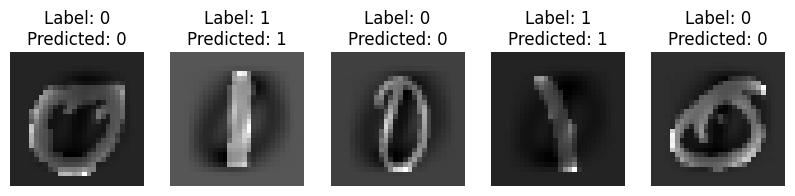

In [27]:
# # Part 6: Visualizing Example Predictions

# Plot some examples from the test set and their predicted labels

# Uncomment below to visualize some test examples
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

# Ensure we only plot as many images as we have predictions for
num_examples = min(5, len(X_test), len(y_test_pred_binary))

for i, ax in enumerate(axes[:num_examples]):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_test.values[i]}\nPredicted: {y_test_pred_binary[i]}")
    ax.axis("off")

plt.show()

## Code for Drawing Interface and Prediction

In [28]:
# Create a simple GUI using tkinter for a 28x28 input window

class DigitDrawer:
    def __init__(self, root, model, scaler):
        self.root = root
        self.model = model
        self.scaler = scaler

        self.canvas = tk.Canvas(root, width=280, height=280, bg="white")
        self.canvas.pack()

        # Bind mouse events for drawing
        self.canvas.bind("<B1-Motion>", self.draw)

        # Button to clear canvas
        self.clear_button = tk.Button(root, text="Clear", command=self.clear_canvas)
        self.clear_button.pack()

        # Button to predict the drawn digit
        self.predict_button = tk.Button(root, text="Predict", command=self.predict_digit)
        self.predict_button.pack()

        # Label to show the prediction result
        self.prediction_label = tk.Label(root, text="Draw a digit (0 or 1) and click 'Predict'")
        self.prediction_label.pack()

    def draw(self, event):
        # Draw a small rectangle where the user drags the mouse
        x, y = event.x, event.y
        self.canvas.create_rectangle(x, y, x+20, y+20, fill="black")

    def clear_canvas(self):
        # Clear the canvas for a new drawing
        self.canvas.delete("all")
        self.prediction_label.config(text="Draw a digit (0 or 1) and click 'Predict'")

    def predict_digit(self):
        # Get the canvas as an image and preprocess it for prediction
        self.canvas.update()
        x = self.root.winfo_rootx() + self.canvas.winfo_x()
        y = self.root.winfo_rooty() + self.canvas.winfo_y()
        x1 = x + self.canvas.winfo_width()
        y1 = y + self.canvas.winfo_height()

        # Capture the drawn content as an image
        img = ImageGrab.grab((x, y, x1, y1)).convert("L")  # Convert to grayscale
        img = img.resize((28, 28), Image.LANCZOS)  # Resize to 28x28
        img_data = np.array(img)  # Convert image to array

        # Invert colors (since model expects white background)
        img_data = 255 - img_data

        # Flatten and normalize the data
        img_data = img_data.flatten().reshape(1, -1)  # Flatten to 1x784
        img_data = self.scaler.transform(img_data)  # Normalize based on training data

        # Predict using the linear regression model
        prediction = self.model.predict(img_data)
        predicted_digit = int(prediction > 0.5)  # 0 or 1 based on threshold

        # Display the prediction
        self.prediction_label.config(text=f"Predicted Digit: {predicted_digit}")

# Set up tkinter window
root = tk.Tk()
root.title("Draw a Digit (0 or 1)")

# TODO Initialize the digit drawer app with scaler normalization
app = DigitDrawer(root, model, scaler)

# Run the tkinter main loop
root.mainloop()


C:\Users\Sayan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sayan\AppData\Local\Temp\ipykernel_10728\2428009333.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_digit = int(prediction > 0.5)  # 0 or 1 based on threshold
C:\Users\Sayan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sayan\AppData\Local\Temp\ipykernel_10728\2428009333.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfo